In [236]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [237]:


file_path   = r"C:\Users\anjal\OneDrive\Desktop\Data Science\DS 3- Project\Resumes"
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)
    
    # Make sure it's a directory
    if not os.path.isdir(folder_path):
        continue

    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.pdf'):
            pdf_file.append(file)
            folder_name.append(folder)


In [238]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [239]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


In [240]:
directory = r"C:\Users\anjal\OneDrive\Desktop\Data Science\DS 3- Project\Resumes"
print(os.listdir(directory))

['Peoplesoft Resume', 'React Developer', 'SQL Developer', 'workday']


In [241]:
# Extract from the Dataset

In [242]:
file_path1 = []
category1  = []
directory1 =r'C:\Users\anjal\OneDrive\Desktop\Data Science\DS 3- Project\Resumes\React Developer'

for i in os.listdir(directory1):
    if i.endswith('.docx'):                 # or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('React Developer')

In [243]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1.head()

,Raw_Details,Category1
0,Name: Ravali P \n\n\n\n ...,React Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React Developer


In [244]:
file_path2 = []
category2  = []
directory2 =r'C:\Users\anjal\OneDrive\Desktop\Data Science\DS 3- Project\Resumes\Peoplesoft Resume'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('Peoplesoft Resume')

In [245]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2.head()

,Raw_Details,Category2
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft Resume
1,Classification: Internal\n\nClassification: In...,Peoplesoft Resume
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft Resume
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft Resume
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft Resume


In [246]:
file_path3 = []
category3  = []
directory3 =r'C:\Users\anjal\OneDrive\Desktop\Data Science\DS 3- Project\Resumes\SQL Developer'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [247]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3.head()

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer


In [248]:
file_path4 = []
category4  = []
directory4 =r'C:\Users\anjal\OneDrive\Desktop\Data Science\DS 3- Project\Resumes\Workday'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [249]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4.head(5)

,Raw_Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
2,G Himaja\n\n ...,Workday
3,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
4,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday


In [250]:

resume_data = pd.concat([data1, data2, data3, data4], ignore_index=True)
resume_data.head(5)

,Raw_Details,Category1,Category2,Category3,Category4
0,Name: Ravali P \n\n\n\n ...,React Developer,NaN,NaN,NaN
1,SUSOVAN BAG \n\nSeeking a challenging po...,React Developer,NaN,NaN,NaN
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React Developer,NaN,NaN,NaN
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React Developer,NaN,NaN,NaN
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React Developer,NaN,NaN,NaN


In [251]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  52 non-null     object
 1   Category1    20 non-null     object
 2   Category2    10 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


In [252]:
# Merge all Unnecessary column in One Column

resume_data['Category'] = category1 + category2 + category3 + category4
resume_data.head(5)

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Name: Ravali P \n\n\n\n ...,React Developer,NaN,NaN,NaN,React Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React Developer,NaN,NaN,NaN,React Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React Developer,NaN,NaN,NaN,React Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React Developer,NaN,NaN,NaN,React Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React Developer,NaN,NaN,NaN,React Developer


In [253]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]
resume_data.head(5)

,Category,Raw_Details
0,React Developer,Name: Ravali P \n\n\n\n ...
1,React Developer,SUSOVAN BAG \n\nSeeking a challenging po...
2,React Developer,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
3,React Developer,HARIPRIYA BATTINA \n\nExperience as UI Develop...
4,React Developer,KAMALAKAR REDDY. A \n\nLinked In: https://www....


In [254]:
# Save as a new CSV File

resume_data.to_csv('Raw_Resume.csv', index=False)

resume_data = pd.read_csv("Raw_Resume.csv")
resume_data.head(5)

,Category,Raw_Details
0,React Developer,Name: Ravali P \n\n\n\n ...
1,React Developer,SUSOVAN BAG \n\nSeeking a challenging po...
2,React Developer,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
3,React Developer,HARIPRIYA BATTINA \n\nExperience as UI Develop...
4,React Developer,KAMALAKAR REDDY. A \n\nLinked In: https://www....


In [255]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

In [256]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() 

stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [257]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data.head(10)

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,React Developer,Name: Ravali P \n\n\n\n ...,1795,6175,179,12
1,React Developer,SUSOVAN BAG \n\nSeeking a challenging po...,533,1901,39,0
2,React Developer,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,524,4005,138,6
3,React Developer,HARIPRIYA BATTINA \n\nExperience as UI Develop...,404,2669,106,6
4,React Developer,KAMALAKAR REDDY. A \n\nLinked In: https://www....,357,2672,48,8
5,React Developer,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,253,1789,58,1
6,React Developer,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,502,3132,86,2
7,React Developer,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",349,3156,93,5
8,React Developer,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,181,1925,34,7
9,React Developer,Ui-Developer/ React JS Developer \n\nNAME: KRI...,361,3700,112,2


In [258]:
# Text Pre-Processing

In [259]:
#Using Regular Expression

def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [260]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

In [261]:
# Clean Text from Resume
resume_data.head(10)


,Category,Raw_Details,Resume_Details
0,React Developer,Name: Ravali P \n\n\n\n ...,name ravali curriculum vitae specialization co...
1,React Developer,SUSOVAN BAG \n\nSeeking a challenging po...,susovan bag seeking challenging position field...
2,React Developer,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,kanumuru deepak reddy career objective secure ...
3,React Developer,HARIPRIYA BATTINA \n\nExperience as UI Develop...,haripriya battina experience developer reactjs...
4,React Developer,KAMALAKAR REDDY. A \n\nLinked In: https://www....,kamalakar reddy linked professional summary ye...
5,React Developer,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,naveen sadhu title software developer location...
6,React Developer,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,pragnya pattnaik expertise around years experi...
7,React Developer,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",sarala madasu sarala madasu sri geethika prest...
8,React Developer,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,thirupathamma balla summary year experience re...
9,React Developer,Ui-Developer/ React JS Developer \n\nNAME: KRI...,developer react developer name krishna profess...


In [262]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data.head(10)

,Category,Resume_Details
0,React Developer,name ravali curriculum vitae specialization co...
1,React Developer,susovan bag seeking challenging position field...
2,React Developer,kanumuru deepak reddy career objective secure ...
3,React Developer,haripriya battina experience developer reactjs...
4,React Developer,kamalakar reddy linked professional summary ye...
5,React Developer,naveen sadhu title software developer location...
6,React Developer,pragnya pattnaik expertise around years experi...
7,React Developer,sarala madasu sarala madasu sri geethika prest...
8,React Developer,thirupathamma balla summary year experience re...
9,React Developer,developer react developer name krishna profess...


In [263]:


# Get value counts
category_counts = resume_data['Category'].value_counts()


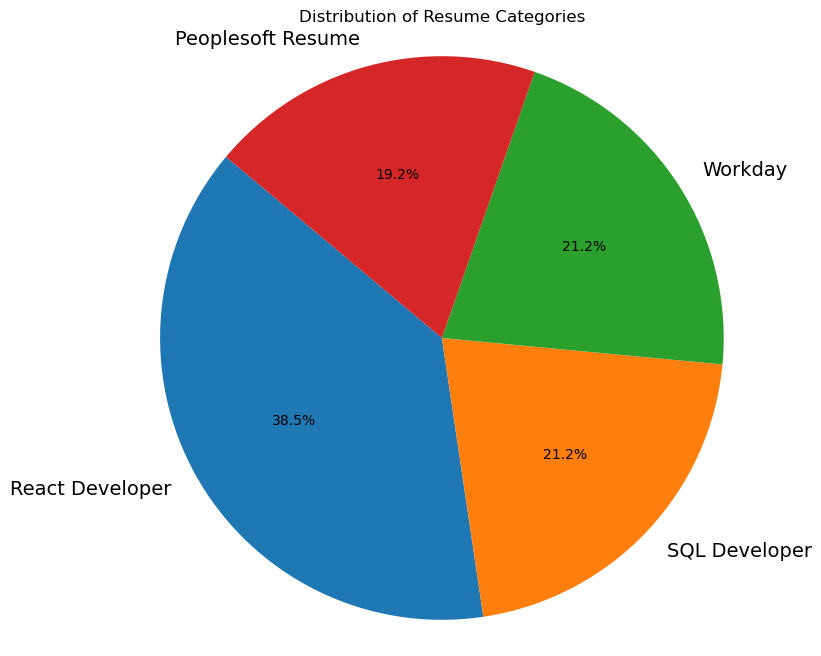

In [264]:
# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Resume Categories')
plt.axis('equal') 
plt.show()

In [265]:
resume_data.Resume_Details[5]

'naveen sadhu title software developer location hyderabad india professional summary year overall experience html sql reactjs nodejs experience working application development testing tool hard working enthusiastic excellent communication interpersonal analytical skills strong ability perform part team exceptional ability learn new concepts education bachelor technology computer science engineering marri laxman reddy institute technology management affiliated jntuh skills technology mern stack frameworks framework ides eclipse visual studio code databases sql mongo database operating systems windows unix professional experience current project client inline usa organization edvenswa tech pvt ltd technology mern stack html css bootstrap description project goal provide whenever user wants servicing bike directly application book slot bike servicing whenever customer problem directly book service service provider take bike servicing contribution understand implement features negotiate sc

In [266]:
# Named Entity Recognition (NER)

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 330), ('using', 253), ('workday', 232), ('sql', 213), ('application', 208), ('server', 188), ('project', 183), ('data', 180), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 136), ('react', 132), ('process', 123), ('skills', 118), ('system', 116), ('good', 108), ('client', 105), ('tools', 102), ('working', 101), ('involved', 99), ('database', 99), ('various', 97), ('creating', 97), ('developer', 94), ('support', 94), ('like', 94), ('hcm', 94), ('worked', 93), ('integrations', 92), ('development', 91), ('technical', 89), ('integration', 87), ('servers', 86), ('services', 85), ('report', 83), ('people', 81), ('html', 80), ('created', 80), ('design', 78), ('used', 77), ('team', 74), ('role', 74), ('responsibilities', 72), ('work', 71), ('studio', 71), ('eib', 71), ('testing', 70), ('management', 69)]


In [267]:
# Parts Of Speech (POS) Tagging
import spacy
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [268]:
for token in doc_block[:10]:
    print(token,token.pos_)  

wledge PROPN
constructor NOUN
good ADJ
knowledge NOUN
abstraction NOUN
good ADJ
knowledge NOUN
encapsulation PROPN
good ADJ
knowledge NOUN


In [269]:
# Filtering out only the Nouns and Verbs from the Text 

one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['name', 'specialization', 'computer', 'science', 'utilize', 'skills', 'achieving', 'target', 'developing', 'performance', 'organization', 'ion', 'ion', 'degree', 'course', 'year', 'passing', 'cgpacgpa', 'institute', 'examination', 'board', 'testing', 'skills', 'knowledge', 'concepts', 'testing', 'knowledge', 'testing', 'integration', 'testing', 'knowledge', 'system', 'testing', 'knowledge', 'testing', 'reliability', 'testing', 'knowledge', 'testing', 'knowledge', 'concepts', 'knowledge', 'test', 'cases', 'test', 'scenarios', 'knowledge', 'globalization', 'testing', 'compatibility', 'testing', 'knowledge', 'regression', 'testing', 'plan', 'methdology', 'knowledge', 'scrum', 'methodology', 'expertise', 'sprint', 'planning', 'meeting', 'knowledge', 'scrum', 'meeting', 'knowledge', 'sprint', 'meeting', 'knowledge', 'product', 'backlog', 'meeting', 'bug', 'triage', 'meeting', 'knowledge', 'normalization', 'skills', 'knowledge', 'method', 'overloading', 'method', 'overriding', 'understandin

In [270]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:10]

,Words,Count
0,experience,295
1,using,252
2,application,205
3,project,172
4,data,170
5,reports,170
6,workday,164
7,business,158
8,web,145
9,react,122


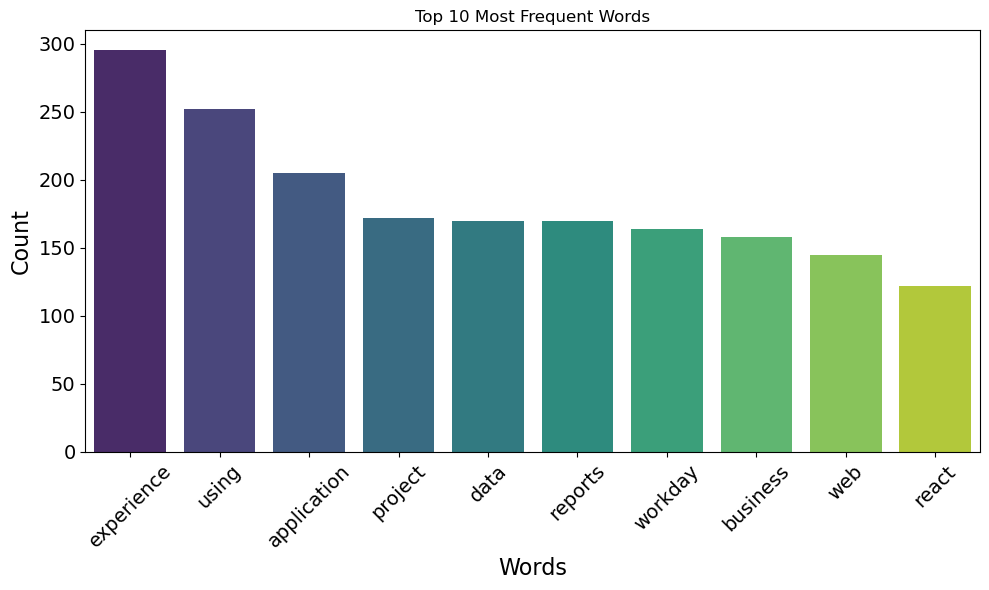

In [271]:
import seaborn as sns

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=top_words, x='Words', y='Count', palette='viridis')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Model Building

In [273]:
resume_data.head()

,Category,Resume_Details
0,React Developer,name ravali curriculum vitae specialization co...
1,React Developer,susovan bag seeking challenging position field...
2,React Developer,kanumuru deepak reddy career objective secure ...
3,React Developer,haripriya battina experience developer reactjs...
4,React Developer,kamalakar reddy linked professional summary ye...


In [274]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data.head(5)

,Category,Resume_Details,LebelEncoding
0,React Developer,name ravali curriculum vitae specialization co...,1
1,React Developer,susovan bag seeking challenging position field...,1
2,React Developer,kanumuru deepak reddy career objective secure ...,1
3,React Developer,haripriya battina experience developer reactjs...,1
4,React Developer,kamalakar reddy linked professional summary ye...,1


In [275]:
resume_data.describe()

,LebelEncoding
count,52.000000
mean,1.442308
std,1.036840
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


In [276]:
resume_data.isnull().sum()

Category          0
Resume_Details    0
LebelEncoding     0
dtype: int64

In [277]:
# Train - Test Split


x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [278]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((39,), (13,))

In [279]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)


In [280]:
x_train.shape, x_test.shape

((39, 2721), (13, 2721))

In [281]:
print(y_train),print(y_test)

['React Developer' 'Workday' 'SQL Developer' 'Peoplesoft Resume'
 'React Developer' 'Peoplesoft Resume' 'SQL Developer' 'Peoplesoft Resume'
 'React Developer' 'Peoplesoft Resume' 'React Developer'
 'Peoplesoft Resume' 'React Developer' 'React Developer' 'Workday'
 'SQL Developer' 'SQL Developer' 'React Developer' 'React Developer'
 'React Developer' 'React Developer' 'Peoplesoft Resume' 'React Developer'
 'React Developer' 'Peoplesoft Resume' 'SQL Developer' 'SQL Developer'
 'Workday' 'Workday' 'Workday' 'SQL Developer' 'React Developer' 'Workday'
 'Peoplesoft Resume' 'Workday' 'React Developer' 'React Developer'
 'Workday' 'SQL Developer']
['Peoplesoft Resume' 'React Developer' 'Peoplesoft Resume' 'Workday'
 'React Developer' 'SQL Developer' 'React Developer' 'Workday'
 'SQL Developer' 'Workday' 'React Developer' 'React Developer'
 'SQL Developer']


(None, None)

# 5.Model Classification

In [284]:
# 1.Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier DecisionTreeClassifier():
                   precision    recall  f1-score   support

Peoplesoft Resume       0.67      1.00      0.80         2
  React Developer       1.00      0.80      0.89         5
    SQL Developer       1.00      1.00      1.00         3
          Workday       1.00      1.00      1.00         3

         accuracy                           0.92        13
        macro avg       0.92      0.95      0.92        13
     weighted avg       0.95      0.92      0.93        13




In [286]:
#2.Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         2
  React Developer       1.00      1.00      1.00         5
    SQL Developer       1.00      1.00      1.00         3
          Workday       1.00      1.00      1.00         3

         accuracy                           1.00        13
        macro avg       1.00      1.00      1.00        13
     weighted avg       1.00      1.00      1.00        13




In [288]:
# 3.model_svm = SVC()

from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier SVC():
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         2
  React Developer       0.83      1.00      0.91         5
    SQL Developer       1.00      0.67      0.80         3
          Workday       1.00      1.00      1.00         3

         accuracy                           0.92        13
        macro avg       0.96      0.92      0.93        13
     weighted avg       0.94      0.92      0.92        13




In [290]:
# 4.AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier


model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         2
  React Developer       1.00      1.00      1.00         5
    SQL Developer       1.00      1.00      1.00         3
          Workday       1.00      1.00      1.00         3

         accuracy                           1.00        13
        macro avg       1.00      1.00      1.00        13
     weighted avg       1.00      1.00      1.00        13




In [292]:
# 5.Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier


model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         2
  React Developer       1.00      1.00      1.00         5
    SQL Developer       1.00      1.00      1.00         3
          Workday       1.00      1.00      1.00         3

         accuracy                           1.00        13
        macro avg       1.00      1.00      1.00        13
     weighted avg       1.00      1.00      1.00        13




In [294]:
Evaluation = {"Models":["DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "AdaBoost Classifier","Gradient Boosting Classifier"],\
            "Train_Accuracy(%)":[model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),
                                 model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_DT,accuracy_RF,accuracy_svm,accuracy_Adaboost,accuracy_GradientBoost],\
            "Precision(%)":[precision_DT,precision_RF,precision_svm,precision_Adaboost,precision_Gradientboost],\
            "Recall(%)":[recall_DT,recall_RF,recall_svm,recall_Adaboost,recall_Gradientboost],\
            "F1-Score(%)":[f1_DT,f1_RF,f1_svm,f1_Adaboost,f1_Gradientboost]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,DecisionTree Classifier,1.0,0.92,0.92,0.95,0.92
1,RandomForest Classifier,1.0,1.00,1.00,1.00,1.00
2,SVM Classifier,1.0,0.92,0.96,0.92,0.93
3,AdaBoost Classifier,1.0,1.00,1.00,1.00,1.00
4,Gradient Boosting Classifier,1.0,1.00,1.00,1.00,1.00


# Model Deployment

In [297]:
import pickle

filename = 'modelDT.pkl'
pickle.dump(model_DT,open(filename,'wb'))

In [299]:
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))

In [ ]:
# Pipeline 

In [345]:
import pandas as pd
import re
import nltk
import joblib

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Setup
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))
    tokens = text.lower().split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

def main():
    # 2. Load data
    df = pd.read_csv('Raw_Resume.csv')
    print("Columns:", df.columns)

    # Use correct column names
    if 'cleaned_resume' not in df.columns:
        df['cleaned_resume'] = df['Raw_Details'].apply(clean_text)

    X = df['cleaned_resume']
    y = df['Category']

    # 3. Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Build pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', MultinomialNB())
    ])

    # 5. Train model
    pipeline.fit(X_train, y_train)

    # 6. Evaluate
    y_pred = pipeline.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # 7. Save model
    joblib.dump(pipeline, 'resume_classifier.pkl')
    print("Model saved as 'resume_classifier.pkl'")

    # 8. Example prediction
    example = "Looking for a software engineering role with Python expertise..."
    pred = pipeline.predict([example])
    print(f"Prediction for example text: {pred[0]}")

if __name__ == "__main__":
    main()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anjal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anjal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Columns: Index(['Category', 'Raw_Details'], dtype='object')
Accuracy: 1.0
                 precision    recall  f1-score   support

React Developer       1.00      1.00      1.00         6
  SQL Developer       1.00      1.00      1.00         1
        Workday       1.00      1.00      1.00         4

       accuracy                           1.00        11
      macro avg       1.00      1.00      1.00        11
   weighted avg       1.00      1.00      1.00        11

Model saved as 'resume_classifier.pkl'
Prediction for example text: React Developer
